## Preprocessing

In [95]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from pathlib import Path
from imblearn.combine import SMOTEENN
from collections import Counter

In [96]:
#Import and read the charity_data.csv.
ccfraud_df = pd.read_csv("Resources/fraud_test.csv")
ccfraud_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


Pre Processing of CSV File for Machine Learning

In [97]:
#Drop identifier columns
ccfraud_df = ccfraud_df.drop(['trans_date_trans_time','Unnamed: 0','cc_num','first','last','street','dob','trans_num'],axis=1)

#drop complicating columns
ccfraud_df = ccfraud_df.drop(['merchant','city','job','state'],axis=1)

ccfraud_df.head()

,category,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,personal_care,2.86,M,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,personal_care,29.84,F,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0
2,health_fitness,41.28,F,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0
3,misc_pos,60.05,M,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0
4,travel,3.19,M,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0


In [98]:
# Generate our categorical variable lists
ccfraud_cat = ccfraud_df.dtypes[ccfraud_df.dtypes == "object"].index.tolist()

In [99]:
# Check the number of unique values in each column
ccfraud_df[ccfraud_cat].nunique()

category    14
gender       2
dtype: int64

In [100]:
# Convert categorical data to numeric with `pd.get_dummies`
ccfraud_df = pd.get_dummies(ccfraud_df,dtype=float)
ccfraud_df

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,category_entertainment,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M
0,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,43.77,63453,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
555715,111.84,77566,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
555716,86.88,99323,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
555717,7.99,83643,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [101]:
# Split our preprocessed data into our features and target arrays
y = ccfraud_df["is_fraud"].values
X = ccfraud_df.drop(['is_fraud'], axis=1).values

In [102]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [103]:
#Check how many cases of non-fraud/fraud there are in initial training data set
Counter(y_train)

Counter({0: 415173, 1: 1616})

In [104]:
#use smoteenn to generate more fraud samples for training (only use on training data)
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

In [105]:
#Check how many cases of non-fraud/fraud there are in data set after using SMOTEENN
Counter(y_resampled)

Counter({1: 410528, 0: 396257})

In [106]:
# Create a StandardScaler instances (using SMOTEENN data)
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_resampled)

# Scale the data
X_train_scaled = X_scaler.transform(X_resampled)
X_test_scaled = X_scaler.transform(X_test)

In [107]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_resampled[0])
hidden_nodes_layer1 =  6
hidden_nodes_layer2 = 6
hidden_nodes_layer3 = 6

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

/Users/emiliaroberts/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 6)              │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

In [108]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [119]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_resampled,epochs=3)

Epoch 1/3
25213/25213 ━━━━━━━━━━━━━━━━━━━━ 9s 371us/step - accuracy: 0.9847 - loss: 0.0445
Epoch 2/3
25213/25213 ━━━━━━━━━━━━━━━━━━━━ 9s 370us/step - accuracy: 0.9848 - loss: 0.0441
Epoch 3/3
25213/25213 ━━━━━━━━━━━━━━━━━━━━ 9s 370us/step - accuracy: 0.9850 - loss: 0.0434


In [120]:
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

4342/4342 - 1s - 251us/step - accuracy: 0.9950 - loss: 0.0273
Loss: 0.02726711891591549, Accuracy: 0.9949615001678467


In [121]:
#confusion matrix generation
y_prediction = nn.predict(X_test_scaled)
y_prediction = np.round (y_prediction)
y_test=np.round(y_test)
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_prediction)
print(result)


4342/4342 ━━━━━━━━━━━━━━━━━━━━ 1s 228us/step
[[137805    596]
 [   104    425]]


In [122]:
#get feature importance from model
weights = nn.get_weights()
feature_importance = np.sum(np.abs(weights[0]), axis=1)

#drop is_fraud category
features_index = ccfraud_df.columns.delete(8)

#create dataframe
feature_df = pd.DataFrame(data=feature_importance,index=features_index,columns=['Feature Weight'])
feature_df
#sort dataframe to see most important values
feature_df.sort_values(by=['Feature Weight'], ascending=False)

,Feature Weight
amt,7.194645
category_shopping_net,6.879355
category_kids_pets,5.472523
category_gas_transport,5.155409
category_misc_net,4.839694
category_grocery_pos,4.312452
category_personal_care,4.248216
category_travel,3.826572
category_shopping_pos,3.801559
category_health_fitness,3.603495


In [134]:
#save weights to csv file (so it doesnt have to be re-run every time)
feature_df.to_csv('Resources/neuralnet_fitweights.csv')

In [123]:
# Define features set
X = ccfraud_df.copy()
X.drop("is_fraud", axis=1, inplace=True)
X.head()

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,category_entertainment,category_food_dining,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M
0,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [124]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [126]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_resampled)

In [128]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [129]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [130]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,138336,65
Actual 1,174,355


Accuracy Score : 0.998279709206075
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    138401
           1       0.85      0.67      0.75       529

    accuracy                           1.00    138930
   macro avg       0.92      0.84      0.87    138930
weighted avg       1.00      1.00      1.00    138930



In [131]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.422409142981437, 'amt'),
 (0.09131835179909627, 'category_grocery_pos'),
 (0.07779881290446211, 'category_shopping_net'),
 (0.05489829204980983, 'category_gas_transport'),
 (0.03514466398229638, 'category_misc_net'),
 (0.033607268089730406, 'category_kids_pets'),
 (0.03069937182853249, 'unix_time'),
 (0.02951587595024985, 'category_personal_care'),
 (0.027791200532104307, 'category_home'),
 (0.01981292684379937, 'category_misc_pos'),
 (0.019515339136585885, 'category_shopping_pos'),
 (0.01777235527447927, 'category_food_dining'),
 (0.016226397200817397, 'category_entertainment'),
 (0.016173563484340972, 'category_health_fitness'),
 (0.015829637840905998, 'gender_M'),
 (0.014791762168923901, 'category_travel'),
 (0.014128056062200576, 'gender_F'),
 (0.013004080100495292, 'city_pop'),
 (0.009259143854500065, 'zip'),
 (0.009207497839240802, 'lat'),
 (0.009115388590508075, 'long'),
 (0.007921813185584377, 'category_grocery_net'),
 (0.007286404227462601, 'merch_long'),
 (0.0067726540724

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

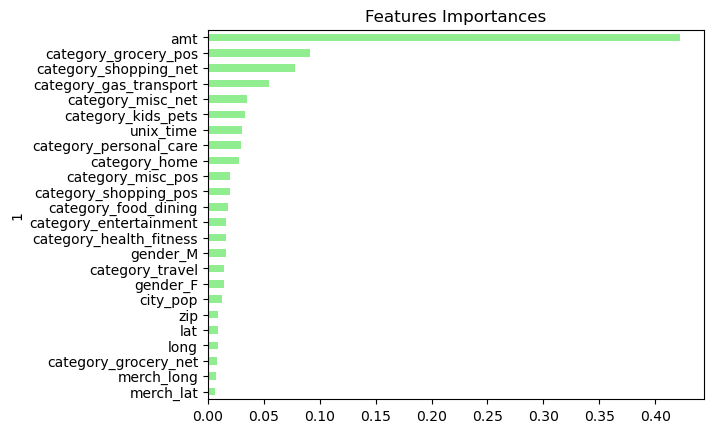

In [133]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')

#take top 10 values
top_importances = importances_sorted


top_importances.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [135]:
#save random forest weights to csv file (so it doesnt have to be re-run every time)
top_importances.to_csv('Resources/randomforest_fitweights.csv')